## CSM Movie Ratings _ Clustering

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
movie = pd.read_excel("2014 and 2015 CSM dataset.xlsx")

# Change the row index
movie.index = movie.index + 1
movie.shape
movie

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
1,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
2,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
3,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
4,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
5,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Child 44,2015,6.4,4,1210000,50000000.0,66.0,1,4,3701061,9325,641,1859,NaN
228,Aloha,2015,5.5,15,21000000,37000000.0,2815.0,1,13,7119456,18803,1128,2290,NaN
229,Unfinished Business,2015,5.4,8,10200000,35000000.0,2777.0,1,7,3450614,6823,325,409,NaN
230,War Room,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,67,201,NaN


### 1. Data Cleaning

In [2]:
# dropping rows with missing values
movie_filtered = movie.dropna() # new dataframe to avoid touching the original

# number of rows containing missing values
print("There are", movie.shape[0] - movie_filtered.shape[0], "rows containing missing values.")

There are 44 rows containing missing values.


In [3]:
movie_filtered

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
1,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
2,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
3,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
4,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
5,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Me and Earl and the Dying Girl,2015,8.2,8,6740000,8000000.0,34.0,1,15,4032265,18398,302,1298,2208.0
214,The Vatican Tapes,2015,4.5,15,1710000,8495000.0,420.0,1,-2,1364537,3824,689,772,3841.0
215,Maggie,2015,5.6,3,131000,4500000.0,79.0,1,10,5085068,14359,600,2468,3744000.0
216,Americons,2015,7.3,3,129000,4000000.0,14.0,1,0,63724,115,28,14,129000.0


---

---

---

### 2. Data Selection

Used `‘Ratings’, ‘Gross’, ‘Budget’, ‘Screens’, ‘Sentiment’, ‘Views’, ‘Likes’, ‘Dislikes’, ‘Comments’ and ‘Aggregate Followers’` for clustering.

### a. Standardizing the variables.

In [4]:
#standardizing
from sklearn.preprocessing import StandardScaler

X_num = movie_filtered.iloc[:, [2,4,5,6,8,9,10,11,12,13]].values
X_scaled = StandardScaler().fit_transform(X_num)

# Assign to a DataFrame: X_d with particular columns name and the row index
X_d = pd.DataFrame(X_scaled, 
                            columns=['Ratings', 'Gross', 'Budget', 'Screens', 'Sentiment', 'Views', 'Likes', 
                                     'Dislikes','Comments', 'Aggregate Followers'],
                            index= range(1, len(movie_filtered)+1))

In [5]:
X_d

,Ratings,Gross,Budget,Screens,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
1,-0.126787,-0.829040,-0.875264,-1.592579,-0.397754,-0.137542,-0.289989,-0.223562,-0.343899,-0.408275
2,0.676914,1.221097,-0.067507,0.676018,-0.118130,-0.707560,-0.330460,-0.501064,-0.473625,1.855235
3,-0.227250,-0.501314,-0.453826,0.374095,-0.397754,-0.766401,-0.439250,-0.521648,-0.513697,-0.536669
4,-0.126787,0.302763,0.986089,0.790109,-0.397754,-0.735111,-0.366388,-0.446936,-0.357160,-0.519536
5,-1.734190,-0.644403,-0.884044,-0.016875,-0.397754,-0.166066,-0.028818,-0.082523,-0.215325,-0.246262
...,...,...,...,...,...,...,...,...,...,...
183,1.782003,-0.757166,-0.805024,-1.600232,1.699425,0.021321,0.187409,-0.317333,-0.153056,-0.633577
184,-1.935115,-0.810878,-0.796332,-1.331701,-0.677378,-0.542457,-0.318010,-0.022296,-0.304692,-0.633248
185,-0.830026,-0.827739,-0.866484,-1.568927,1.000366,0.243812,0.047339,-0.090147,0.184234,0.120616
186,0.877839,-0.827760,-0.875264,-1.614145,-0.397754,-0.817361,-0.446637,-0.526222,-0.523210,-0.608021


---

---

---

### b.  Hierarchical Clustering: ward linkage and Euclidean distance

i. Visualize the clustering by dendrogram. 

/Users/neiledwinsy/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/neiledwinsy/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Cluster Distance')

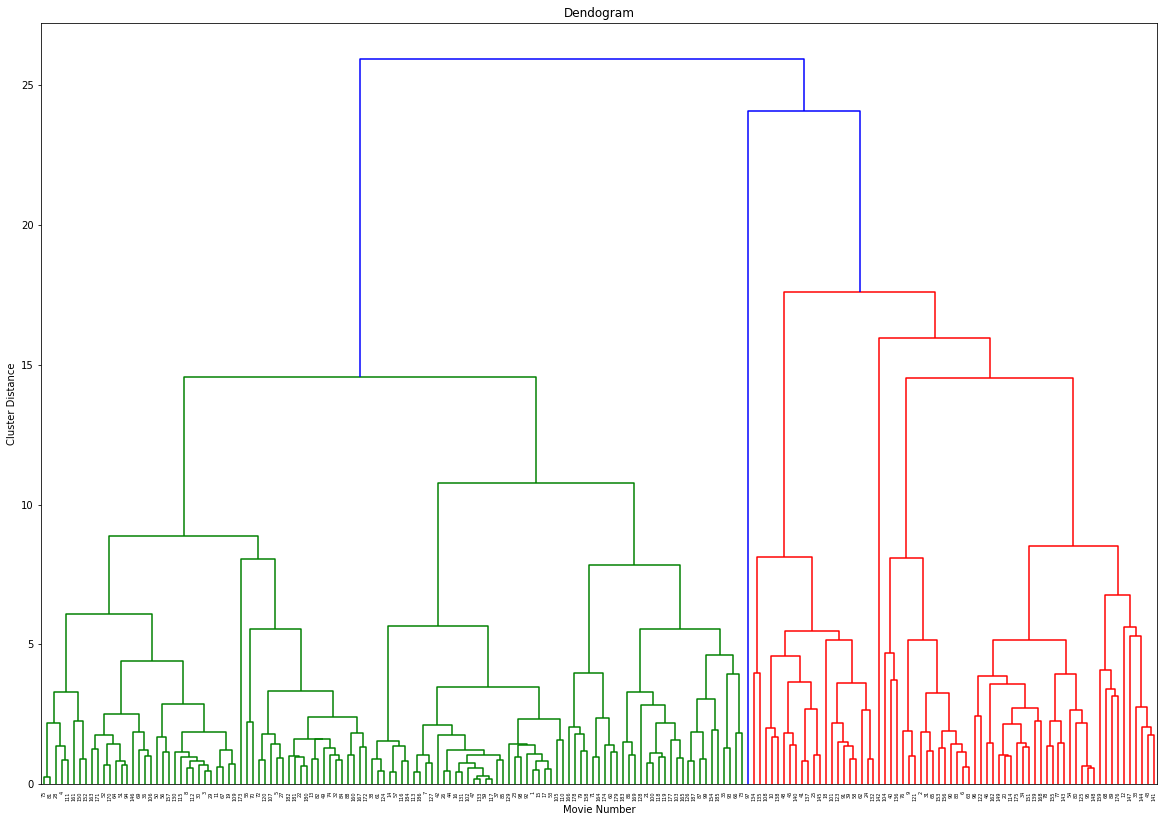

In [6]:
import mglearn
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, ward



from scipy.cluster.hierarchy import dendrogram, linkage

# Apply the linkage clustering to the DataFrame: X_d
# Linkage Method: Ward
# Distance: Euclidean Distance
link = linkage(X_d, method = 'ward', metric='euclidean' )

# Create a figure
fig2 = plt.figure(figsize=(20, 14))

# Plot the dendrogram for the link array containing the DISTANCES between clusters
# Use the observation numbers to indicate the companies
fig2.axes[0] = dendrogram(link, labels = range(1, len(X_scaled)+1))

# xlabel, ylabel, Title
fig2.axes[0].set_title('Dendogram')
fig2.axes[0].set_xlabel('Movie Number')
fig2.axes[0].set_ylabel('Cluster Distance')

#### * Optimal Results

3 clusters as it shows the largest increase when considering the magnitude of the cluster distance. The large distance indicates that there are very distinguishable observations that exist among these clusters.

#### ii. Storing the results

In [7]:
# clustering is based on 3 clusters

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
clusterpredict = cluster.fit_predict(X_d)

clusterpredict

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

---

---

---

### c. K-means Clustering

### i. Visualize the elbow plot.

Text(0, 0.5, 'Within group Sum of Square')

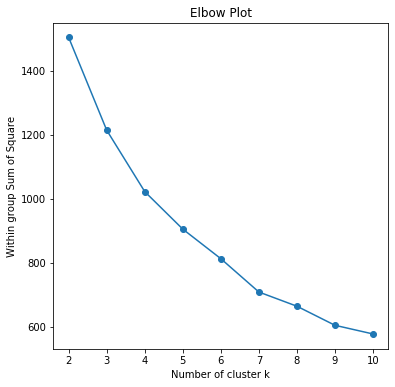

In [8]:
from sklearn.cluster import KMeans

wss= []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_d)
    
    # kmeans.inertia_: Sum of squared distances of samples to their closest cluster center.
    wss.append(kmeans.inertia_)

plt.figure(figsize=(6,6))
plt.plot(range(2, 11), wss, '-o')
plt.title('Elbow Plot')
plt.xlabel('Number of cluster k')
plt.ylabel('Within group Sum of Square')

#### ii. Confirmation of result

It is reasonable as to the left and right of k = 3, there are distinctive steep gradients, giving the image of an "knee", which makes it sensible to choose the number of clusters as 3.

Alternatively, it could be more reasonable to choose the number of clusters to be 4, because the knee is also prominent when comparing the gradients to the left and right of k = 4. Moreover, the "Within group Sum of Square" is reduced by a large 200 when compared to k = 3. Other values to the right generally appear more linear and experience smaller reductions of approximately 100 in terms of the "Within group Sum of Square".

#### iii. Choosing the number of clusters to be 4, store the labels into a new variable.

In [9]:
# Number of Clusters: 4
# Linkage and distance measure is not specified for the question, so we did not include it
kmeans_f = KMeans(n_clusters=4, random_state=2600)
kmeans_f.fit(X_d)
kmeans = kmeans_f.predict(X_d)
kmeans

array([3, 1, 3, 3, 3, 3, 3, 3, 0, 1, 3, 0, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3,
       3, 1, 1, 3, 3, 1, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 1, 1, 1, 3, 0, 3,
       1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 3, 3, 3, 1, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       0, 0, 1, 3, 3, 3, 0, 0, 2, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 1, 3, 0, 3, 3, 3, 3, 3, 3, 1,
       3, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 1, 0, 3,
       0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

---

---

---

### 3. Business Implications

In [10]:
# for original dataset to find mean and SD later on
movie_filtered['kmeans_label'] = kmeans
movie_filtered['hierarchical_label'] = clusterpredict
wanted_variables = movie_filtered.drop(columns=["Movie","Year","Genre","Sequel"]) # relevant properties as in Q2

/Users/neiledwinsy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/neiledwinsy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# preparing the standardized variables to create an aggregated boxplot later
X_d['kmeans_label'] = kmeans
X_d['hierarchical_label'] = clusterpredict
X_d.head()

,Ratings,Gross,Budget,Screens,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,kmeans_label,hierarchical_label
1,-0.126787,-0.829040,-0.875264,-1.592579,-0.397754,-0.137542,-0.289989,-0.223562,-0.343899,-0.408275,3,1
2,0.676914,1.221097,-0.067507,0.676018,-0.118130,-0.707560,-0.330460,-0.501064,-0.473625,1.855235,1,0
3,-0.227250,-0.501314,-0.453826,0.374095,-0.397754,-0.766401,-0.439250,-0.521648,-0.513697,-0.536669,3,1
4,-0.126787,0.302763,0.986089,0.790109,-0.397754,-0.735111,-0.366388,-0.446936,-0.357160,-0.519536,3,1
5,-1.734190,-0.644403,-0.884044,-0.016875,-0.397754,-0.166066,-0.028818,-0.082523,-0.215325,-0.246262,3,1


,Ratings,Gross,Budget,Screens,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,kmeans_label
hierarchical_label,,,,,,,,,,,
0,6.761765,1.516897e+08,9.367794e+07,3429.985294,2.470588,6.455606e+06,19601.970588,1303.117647,2883.102941,5.940500e+06,0.558824
1,6.220339,3.457694e+07,3.124405e+07,1695.711864,3.025424,2.233555e+06,6155.813559,347.016949,911.822034,1.525681e+06,2.822034
2,7.900000,1.250000e+08,1.200000e+07,3173.000000,7.000000,3.262678e+07,370552.000000,4752.000000,38363.000000,4.240000e+06,2.000000


,Ratings,Gross,Budget,Screens,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,kmeans_label
hierarchical_label,,,,,,,,,,,
0,0.924465,1.169453e+08,6.573629e+07,709.894852,6.66125,5.506409e+06,14406.488499,1926.713423,2982.726360,6.903274e+06,0.780018
1,0.983588,3.329929e+07,3.544680e+07,1377.997160,7.48955,2.185291e+06,6696.751708,383.766377,1111.318649,2.203388e+06,0.674712
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


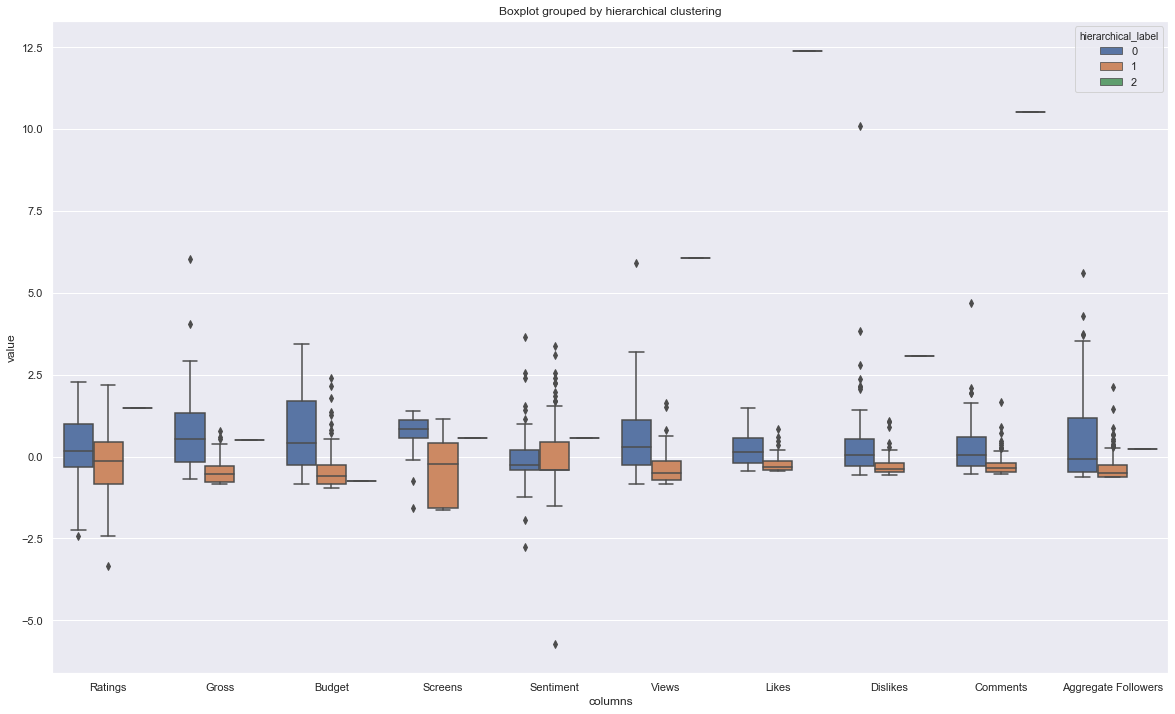

In [12]:
# For hierarchical clustering on b)
# outputs: first dataframe pertains to the 'mean' and the second dataframe pertains to the 'standard deviation'
# 'mean' and 'SD' are based on the original data and not the standardized variables

display(wanted_variables.groupby('hierarchical_label').mean())
display(wanted_variables.groupby('hierarchical_label').std())


#side by side boxplots of scaled variables grouped by hierarchical clustering
XH_scaled_result = X_d
XH_scaled_result['hierarchical_label'] = X_d['hierarchical_label']

XH_scaled_melt = XH_scaled_result.melt(id_vars = 'hierarchical_label',
                  value_vars = ['Ratings', 'Gross', 'Budget', 'Screens', 'Sentiment', 'Views', 'Likes', 
                                     'Dislikes','Comments', 'Aggregate Followers'],
                  var_name = 'columns')
sns.set()
plt.figure(figsize=(20,12))
bh = sns.boxplot(data = XH_scaled_melt,
                hue = 'hierarchical_label',
                x = 'columns',
                y = 'value')

plt.title('Boxplot grouped by hierarchical clustering') 
plt.show()

,Ratings,Gross,Budget,Screens,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,hierarchical_label
kmeans_label,,,,,,,,,,,
0,6.102326,8.258372e+07,6.051860e+07,3128.906977,1.093023,8.785434e+06,25917.767442,1945.883721,3921.348837,5.898232e+06,0.116279
1,7.389655,2.446759e+08,1.502345e+08,3920.551724,2.172414,2.737592e+06,8882.965517,349.275862,1247.793103,5.364230e+06,0.103448
2,7.900000,1.250000e+08,1.200000e+07,3173.000000,7.000000,3.262678e+07,370552.000000,4752.000000,38363.000000,4.240000e+06,2.000000
3,6.290351,3.287964e+07,2.717366e+07,1623.631579,3.640351,2.152429e+06,6028.508772,313.666667,867.035088,1.533313e+06,0.964912


,Ratings,Gross,Budget,Screens,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,hierarchical_label
kmeans_label,,,,,,,,,,,
0,0.937445,5.079792e+07,4.618241e+07,683.878533,7.683668,5.400709e+06,13191.667727,2219.494529,3318.097733,6.722368e+06,0.324353
1,0.717309,1.167543e+08,5.422237e+07,296.006827,8.306920,3.314729e+06,9306.878219,321.228101,1368.374280,6.995629e+06,0.309934
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.932498,3.107109e+07,2.666618e+07,1349.850665,6.598642,1.917974e+06,6450.867546,270.566259,926.578948,2.243136e+06,0.184814


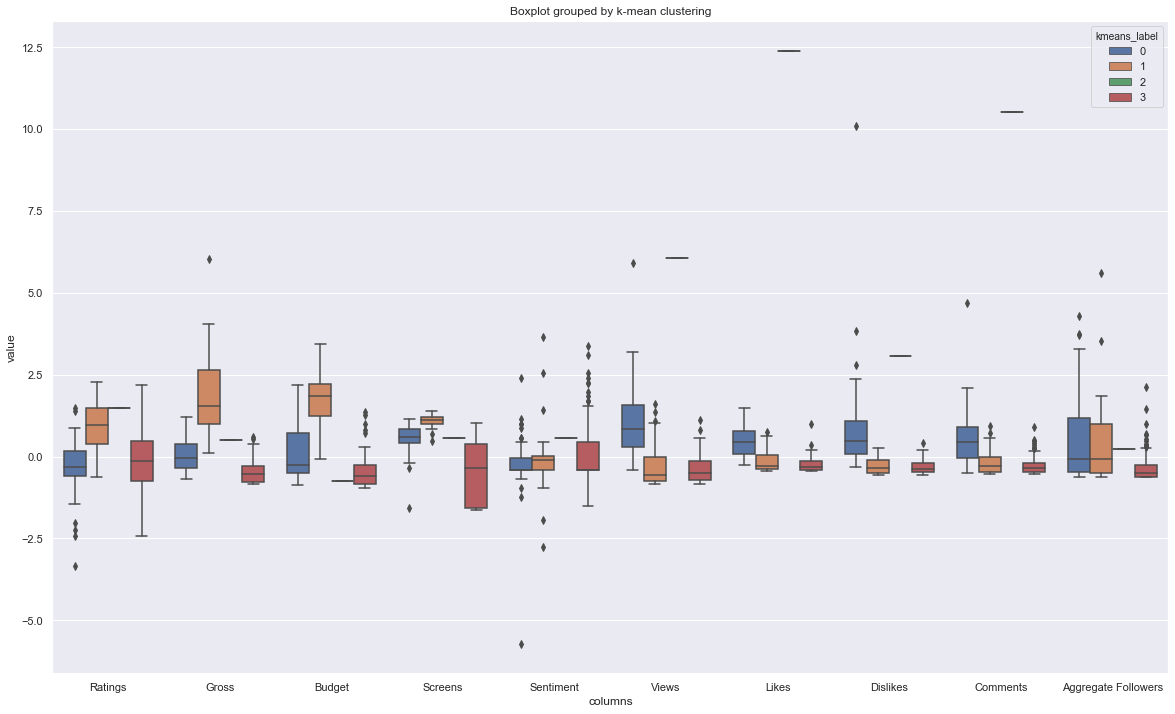

In [13]:
# For k-means clustering on c)
# outputs: first dataframe pertains to the 'mean' and the second dataframe pertains to the 'standard deviation'
# 'mean' and 'SD' are based on the original data and not the standardized variables

display(wanted_variables.groupby('kmeans_label').mean())
display(wanted_variables.groupby('kmeans_label').std())


#side by side boxplots of scaled variables grouped by k-mean clustering
XK_scaled_result = X_d
XK_scaled_result['kmeans_label'] = X_d['kmeans_label']

XK_scaled_melt = XK_scaled_result.melt(id_vars = 'kmeans_label',
                  value_vars = ['Ratings', 'Gross', 'Budget', 'Screens', 'Sentiment', 'Views', 'Likes', 
                                     'Dislikes','Comments', 'Aggregate Followers'],
                  var_name = 'columns')
sns.set()
plt.figure(figsize=(20,12))
b = sns.boxplot(data = XK_scaled_melt,
                hue = 'kmeans_label', # different colors for different cluster
                x = 'columns',
                y = 'value')

plt.title('Boxplot grouped by k-mean clustering') 
plt.show()

---

---

---

<b>Study the statistics of each cluster (e.g. by summary statistics/graphs of the variables) and generalize the cluster properties created by the hierarchical clustering (question 2b(ii)) and k-means clustering (question 2c(iii))). Define your own business objective, which method give you the clustering result that suit your business objective? Explain why.</b>


For a 'business' objective, similar to any firm in any other industry, the goal is to maximise profit for its owners, so we will divide clusters based on their performance. In the future, information on performances by clusters may be used by filmmakers and movie studios in creating movies that are similar to those among the most profitable films. In this analysis, we assume that each variable may affect the movie's overall success in any way; this may be classified into performance or monetary indicators. For instance, the movies's perception - a performance indicator - may affect success, and such indicators could include: ratings, sentiment, views, likes, dislikes, comments, and aggregate followers. Monetary indicators would be more important in determining the profit of releasing a movie; this would include Gross and Budget. To determine profitability and make values more comparable, we will also be using a Gross-to-Budget ratio. This can be computed through dividing Gross by Budget and the interpretation of this formula is the dollar value of gross income per $1 spent on budget. Generally, higher values for this ratio would mean that movies in the cluster are more financially successful.

While one may argue that monetary indicators alone should be the sole basis for our business objective, performance indicators may also have intangible benefits to movie producers by increasing awareness of the director, studio, etc., which may benefit future projects undertaken. Thus, to evaluate the efficacy of our clustering, we will look at monetary and performance indicators separately.

In both Hierarchial and k-means plot, there is one movie that stands out amongst other movies. Looking at the mean output of the codes for both plots, which is based on the raw data instead of standardized variables, confirms that they are the same movie. This movie falls under Cluster 2 in both plots. Cluster 2 will not be considered in the analysis as our group believes that the reason why this movie was classified into its own cluster was because it was too unique and different from other movies in the dataset. Its success, in terms of Ratings, Views, Likes, and Dislikes, would be inreplicable (performance indicators). The scale of its audience cannot be compared to other movies in the dataset as well, which reaches near an astounding 12.5 standard deviations from the mean of other movies based on looking at the k-means plot and approximately 6.3 standards deviations above when looking at the hierarchical plot. Moreover, the ratio of its Gross to Budget is also astounding. It has the lowest budget relative to clusters from both hierarchical and k-means plot. The ratio of its Gross-to-Budget is 10.41, indicating that the movie had a truly magnificent gross income of 10.41 times its budget. For reference, the most profitable clusters in the hierarchial plot and k-means plot contain ratios of approximately 1.619 and 1.629, respectively. 

For the hierarchical plot with three clusters, cluster 0 tends to outperform cluster 1 in all variables but Sentiment. The variation, however, is also much larger with the exception of Screens. However, even with the variation, it most likely retains a higher magnitude for each variable; this is not necessarily a good thing as the budget is also higher, for example. In terms of monetary indicators, cluster 0 has the tendency to have a higher gross and higher budget than cluster 1. Based on mean values, Cluster 0 has roughly thrice the budget of Cluster 1 and a Gross that is 4.39 times more. Given these values, Cluster 0 is likely to perform better, financially. The Gross-to-Budget ratio is approximately 1.619 for Cluster 0 and 1.107 for Cluster 1. In terms of performance indicators, more Views could be a result of greater reach in Screens, however there is no conclusive evidence to support this theory. Cluster 0 has a higher proportion Likes, Dislikes, Comments and possibly Aggregate Followers over Cluster 1. Movies from Cluster 0 have higher Ratings than Cluster 1, however this is in conflict with the generally lower sentiment observed in Cluster 0 over Cluster 1. From these observations, we may conclude that movies in Cluster 0 are more profitable and have better performance indicators.

For the k-means plot with four clusters, the clusters have features that are distinguishable from one another. This means that it is possible that having a plot with four clusters is better than having a plot with three clusters. Looking at the Gross-to-Budget ratio based on means of the Gross and Debt variables, there are distinguishable values (approximated ones) for each cluster: 1.2099 for Cluster 3, 1.3646 for Cluster 0, and 1.6286 for Cluster 1. As reference, there were only more extreme values of 1.107 and 1.619 as ratios in the hierarchical plot. This means that each cluster could be segmented into a low-profit, medium-profit, and high-profit group. As for the performance indicators, it is difficult to tell which cluster is best. Cluster 0 has the most Views, Likes, and Dislikes (which eliminates any positive performance contributed by Likes) - the latter two variables may be influenced by the first, although this claim is unsubstantiated. Cluster 1 has the highest ratings but is average on Likes, Dislikes, Comments, Aggregate Followers. Cluster 3 has the least Screens, lowest Budget, lowest Gross, average Ratings, few Likes, few Dislikes, few Comments, and few Aggregate Followers. Based on these traits, it is possible that Cluster 3 consists of cheap movies with little reach - this translates into few audiences, low-to-average ratings & following group because of budget, and poor outcomes in both financial and performance indicators. On the other hand, Cluster 1 interestingly has the highest Screens, which does not translate to higher views. However, reevaluating the View count with respect to the Gross-to-Budget ratio, provides us with the insight that movies belonging to Cluster 1 are what should be imitated by those engaged in the film industry.

Overall, we believe that the k-means plot of four clusters produces the more suitabe clustering result that suits our business objective. This is because features of clusters become more distinguishable, especially in terms of the financial indicators that we have utilised. Instead of opposite ends in the Gross-to-Debt ratio, as in the hierarchial plot with only three clusters, the values produced by the k-means plot have an intermediate value. On the other hand, in terms of performance indicators, it is hard to tell the differences, but by adding an additional cluster, all clusters remain to exhibit variation, even as Clusters 1 and 3 have similar means in some variables (e.g. Views, Likes, Dislikes, Comments). Among all the clusters produced in the two plots, filmmakers should aspire to produce movies that are most similar to those belonging to <u>Cluster 1 of the k-means plot</u>.

---

---

---

### Appendix: Individual Boxplots (Alternative)

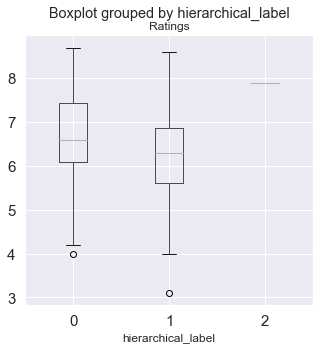

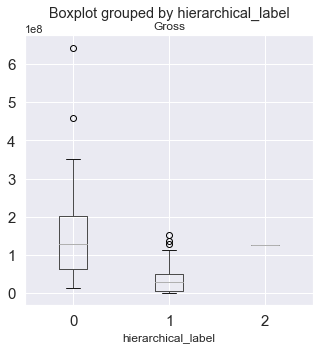

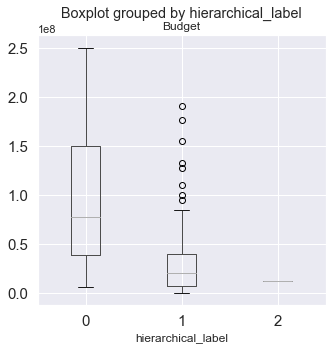

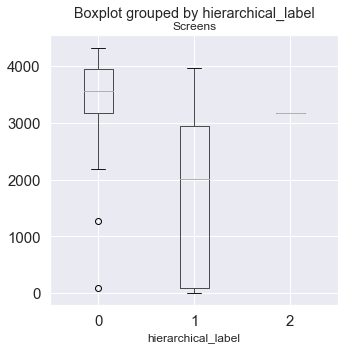

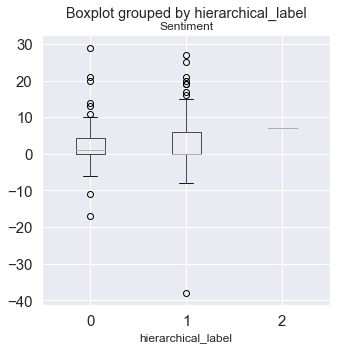

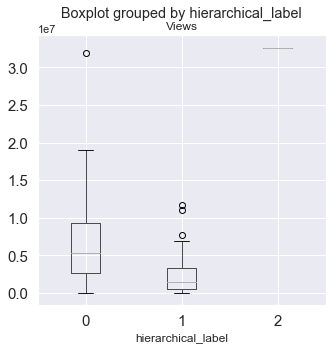

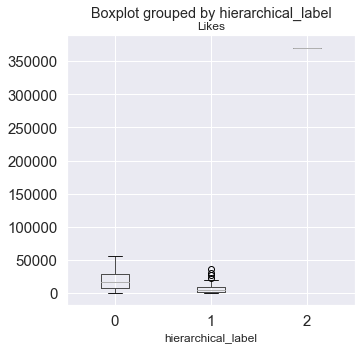

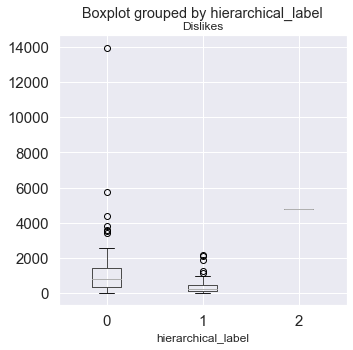

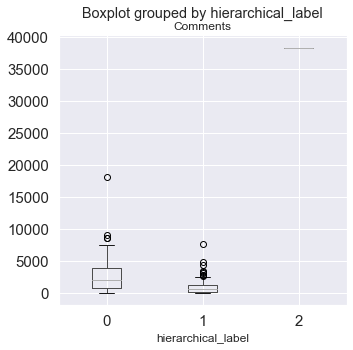

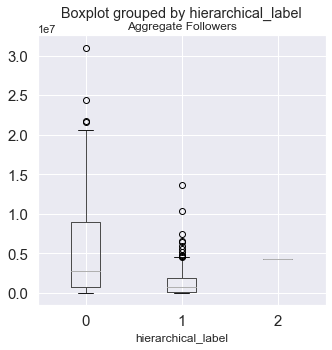

In [14]:
# individual boxplot for HIERARCHICAL clustering
# `-2` excludes the "hierarchical_label" and "kmeans_label" column from the plot
for i in range(len(wanted_variables.columns)-2):
    wanted_variables.boxplot(wanted_variables.columns[i], by = 'hierarchical_label', figsize=(5,5), fontsize=15)

plt.show()

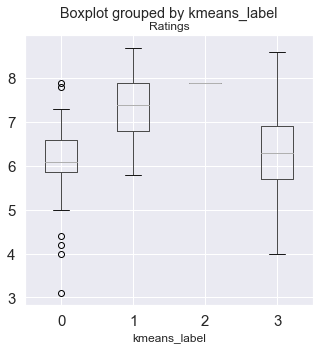

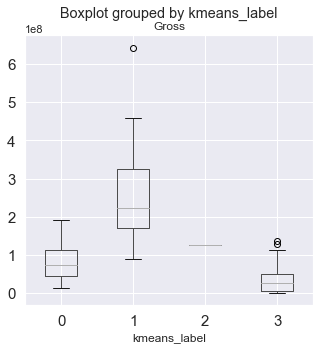

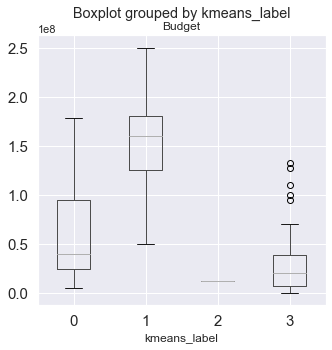

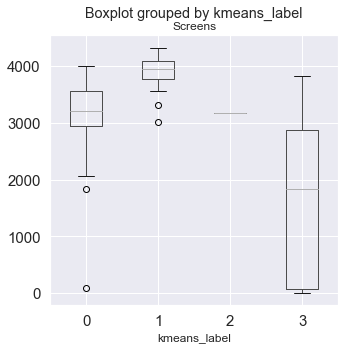

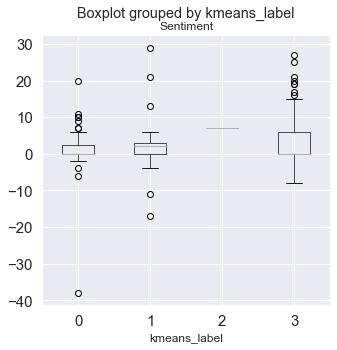

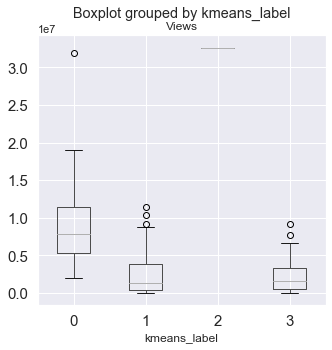

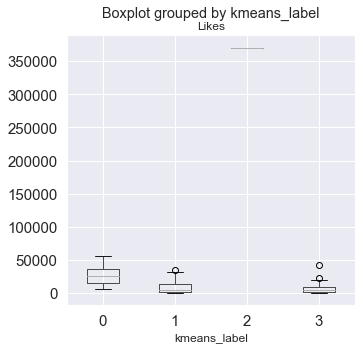

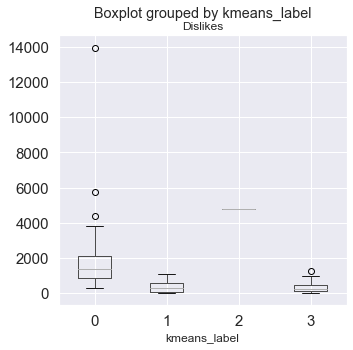

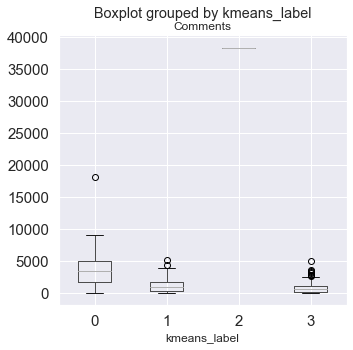

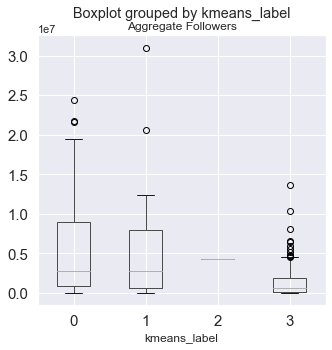

In [15]:
# individual boxplot for K-MEANS clustering
# `-2` excludes the "hierarchical_label" and "kmeans_label" column from the plot
for i in range(len(wanted_variables.columns)-2):
    wanted_variables.boxplot(wanted_variables.columns[i], by = 'kmeans_label', figsize=(5,5), fontsize=15)